<a href="https://colab.research.google.com/github/MeikoFudo/MeikoFudo/blob/main/Indian_Liver_Patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [2]:
def get_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [3]:
read_df = pd.read_csv("/content/indian_liver_patient.csv")
dataFrame = pd.DataFrame(read_df)

In [4]:
dataFrame.head(15)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [5]:
dataFrame.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
dataFrame.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
dataFrame['Albumin_and_Globulin_Ratio'].fillna(dataFrame['Age'].mean(), inplace = True)
dataFrame.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


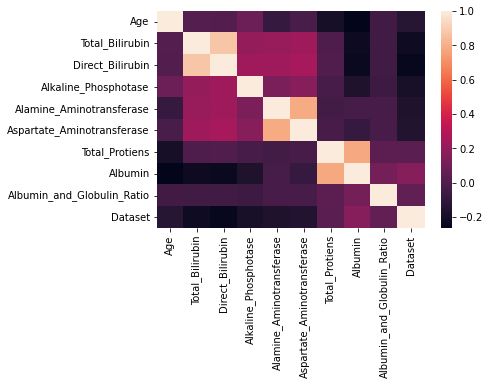

In [9]:
corr = dataFrame.corr()
sns.heatmap(corr)

In [10]:
dataFrame["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
labelEncoder = LabelEncoder()

In [12]:
dataFrame['Gender']= labelEncoder.fit_transform(dataFrame['Gender']) 
dataFrame['Gender'].unique()

array([0, 1])

In [13]:
dataFrame.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
target = dataFrame['Dataset']
dataFrame = dataFrame.drop('Dataset', axis=1)

In [16]:
target

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [17]:
dataFrame

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [18]:
X_train, X_test, y_train, y_test  = train_test_split(dataFrame, target, test_size=0.3, shuffle=True, stratify=None)

In [19]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC

In [20]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

In [21]:
logReg = LogisticRegressionCV()

In [22]:
std_slc = StandardScaler()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logReg)])
penalty = ['l1', 'l2']
n_components = list(range(1,X_train.shape[1]+1,1))
param_grid = dict(pca__n_components=n_components,
                  logistic_Reg__penalty=penalty
                  )

In [23]:
clf = GridSearchCV(pipe, param_grid = param_grid, n_jobs=-1)

In [24]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 2031, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg',
                                        LogisticRegressionCV())]),
             n_jobs=-1,
             param_grid={'logistic_Reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [25]:
clf.best_estimator_.get_params()

{'memory': None,
 'steps': [('std_slc', StandardScaler()),
  ('pca', PCA(n_components=1)),
  ('logistic_Reg', LogisticRegressionCV())],
 'verbose': False,
 'std_slc': StandardScaler(),
 'pca': PCA(n_components=1),
 'logistic_Reg': LogisticRegressionCV(),
 'std_slc__copy': True,
 'std_slc__with_mean': True,
 'std_slc__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 1,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'logistic_Reg__Cs': 10,
 'logistic_Reg__class_weight': None,
 'logistic_Reg__cv': None,
 'logistic_Reg__dual': False,
 'logistic_Reg__fit_intercept': True,
 'logistic_Reg__intercept_scaling': 1.0,
 'logistic_Reg__l1_ratios': None,
 'logistic_Reg__max_iter': 100,
 'logistic_Reg__multi_class': 'auto',
 'logistic_Reg__n_jobs': None,
 'logistic_Reg__penalty': 'l2',
 'logistic_Reg__random_state': None,
 'logistic_Reg__refit': True,
 'logistic_Reg__scoring': None,
 'logistic_Reg__solver': '

In [26]:
logReg = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=5,  penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, n_jobs=-1, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=42 )

In [27]:
logReg.fit(X_train, y_train)

LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)

In [28]:
logReg.score(X_test,y_test)

0.7257142857142858

In [29]:
y_pred = logReg.predict(X_test)

In [30]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [31]:
print('Recall_score: \n', recall_score(y_test, y_pred))
print('Precision_score: \n', precision_score(y_test, y_pred))

Recall_score: 
 0.9761904761904762
Precision_score: 
 0.7321428571428571


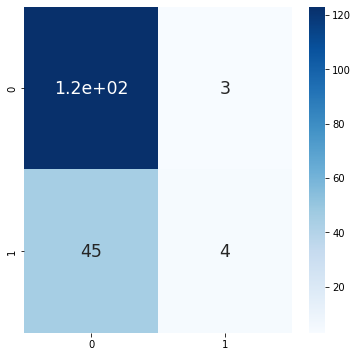

In [39]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cf_matrix, annot=True, cmap='Blues',annot_kws={'fontsize':'xx-large'});

In [32]:
from sklearn.svm import SVC
svc = SVC()

In [33]:
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.001,0.0001, 0.0001],
              } 
grid_svc = GridSearchCV(svc, param_grid_svc, refit = True, verbose = 3)
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.707 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.707 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.707 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.716 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.716 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.707 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.707 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.707 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.716 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.716 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.707 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 0.0001]},
             verbose=3)

In [34]:
print(grid_svc.best_params_)

{'C': 1, 'gamma': 1}


In [36]:
svc = SVC(C = 100, kernel = 'rbf',gamma = 0.001, shrinking = False, random_state = 42)
svc.fit(X_train, y_train)
y_pred_svc = grid_svc.predict(X_test)

In [37]:
print('Recall_score: \n', recall_score(y_test, y_pred_svc))
print('Precision_score: \n', precision_score(y_test, y_pred_svc))

Recall_score: 
 1.0
Precision_score: 
 0.7241379310344828


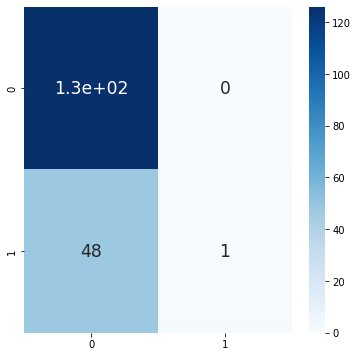

In [38]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6,6))
sns.heatmap(cf_matrix, annot=True, cmap='Blues',annot_kws={'fontsize':'xx-large'});